<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/T_vgg16(3)_1_1TUNED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [105]:
test_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Test"
train_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Train"
val_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Val"

In [106]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [107]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [108]:
nb_train_samples = len(train.filenames)  
nb_train_samples
num_classes=len(train.class_indices)
num_classes

3

In [109]:
from keras.utils.np_utils import to_categorical 
 # get the class lebels for the training data, in the original order  
train_labels = train.classes  
   
 # convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [110]:
validation_labels = validation.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 
validation_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [111]:
test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [112]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

In [113]:
#Defining the VGG Convolutional Neural Net
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

In [114]:
base_model.trainable=True

In [115]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [116]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [117]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(num_classes,activation=('softmax'))) 

# for layer in base_model.layers:
#     layer.trainable = False

#Checking the final model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                

In [118]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [119]:

r= model.fit(train,
             validation_data = validation,
             steps_per_epoch = 262,
             validation_steps=25,
             epochs = 10,
             
             )

Epoch 1/10
262/262 [==============================] - 155s 582ms/step - loss: 0.4162 - accuracy: 0.8236 - val_loss: 0.1594 - val_accuracy: 0.9600
Epoch 2/10
262/262 [==============================] - 152s 578ms/step - loss: 0.0793 - accuracy: 0.9702 - val_loss: 0.0384 - val_accuracy: 0.9600
Epoch 3/10
262/262 [==============================] - 152s 579ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 4/10
262/262 [==============================] - 152s 578ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.1838 - val_accuracy: 0.9600
Epoch 5/10
262/262 [==============================] - 152s 577ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.1710 - val_accuracy: 0.9600
Epoch 6/10
262/262 [==============================] - 152s 581ms/step - loss: 0.0229 - accuracy: 0.9912 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 7/10
262/262 [==============================] - 151s 576ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0328 -

In [120]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 50s 18ms/step - loss: 0.0952 - accuracy: 0.9703
Test Accuracy: 97.03%
262/262 [==============================] - 127s 486ms/step - loss: 0.0022 - accuracy: 0.9992
Train Accuracy: 99.92%


In [121]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np


# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.966457,0.950837,1.000000,0.971685,0.972431,0.972431
recall,0.991398,0.977419,0.946237,0.971685,0.971685,0.971685
f1-score,0.978769,0.963945,0.972376,0.971685,0.971696,0.971696
support,930.000000,930.000000,930.000000,0.971685,2790.000000,2790.000000


In [122]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[922   8   0]
 [ 21 909   0]
 [ 11  39 880]]


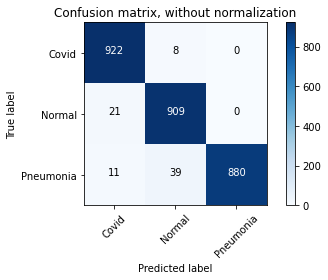

In [123]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Covid', 'Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Text(0.5, 1.0, 'Accuracy Evolution')

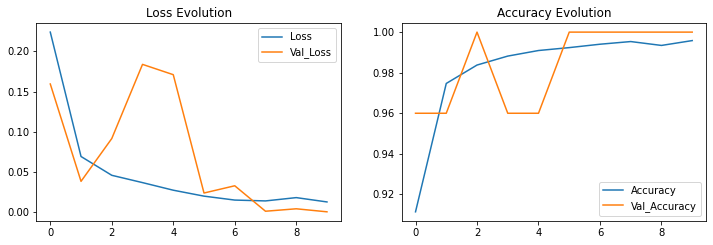

In [124]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')